In [1]:
library(PMA)

In [2]:
# Read clean_data.
data_mirna <- read.csv("../data/clean_data/miRNA_count_data.csv", header=TRUE, row.names=1)
data_rna <- read.csv("../data/clean_data/RAN_total_count_data.csv", header=TRUE, row.names=1)
data_protein <- read.csv("../data/clean_data/proteins_score_data.csv", header=TRUE, row.names=1)

In [3]:
# Transform data to form taken by method implementation.
# TODO : Chek what is scales; columns or rows or all matrix?
data_mirna_m <- t(data.matrix(data_mirna))
data_mirna_s <- scale(data_mirna_m)

data_rna_m <- t(data.matrix(data_rna))
data_rna_s <- scale(data_rna_m)

data_protein_m <- t(data.matrix(data_protein))
data_protein_s <- scale(data_protein_m)

In [4]:
# Prepare inputs.
data <- list(data_mirna_s, data_rna_s, data_protein_s)

In [5]:
# Perform analysis
results_3dcca <- PMA::MultiCCA(data, type="standard", penalty= 5, standardize =FALSE)

12345678910111213

Warning message in PMA::PlotCGH(results_3dcca$ws[[1]]):
“Since chrom was not entered, PlotCGH assumed that all CGH spots in array are on the same chromosome.”
Warning message in PMA::PlotCGH(results_3dcca$ws[[2]]):
“Since chrom was not entered, PlotCGH assumed that all CGH spots in array are on the same chromosome.”
Warning message in PMA::PlotCGH(results_3dcca$ws[[3]]):
“Since chrom was not entered, PlotCGH assumed that all CGH spots in array are on the same chromosome.”


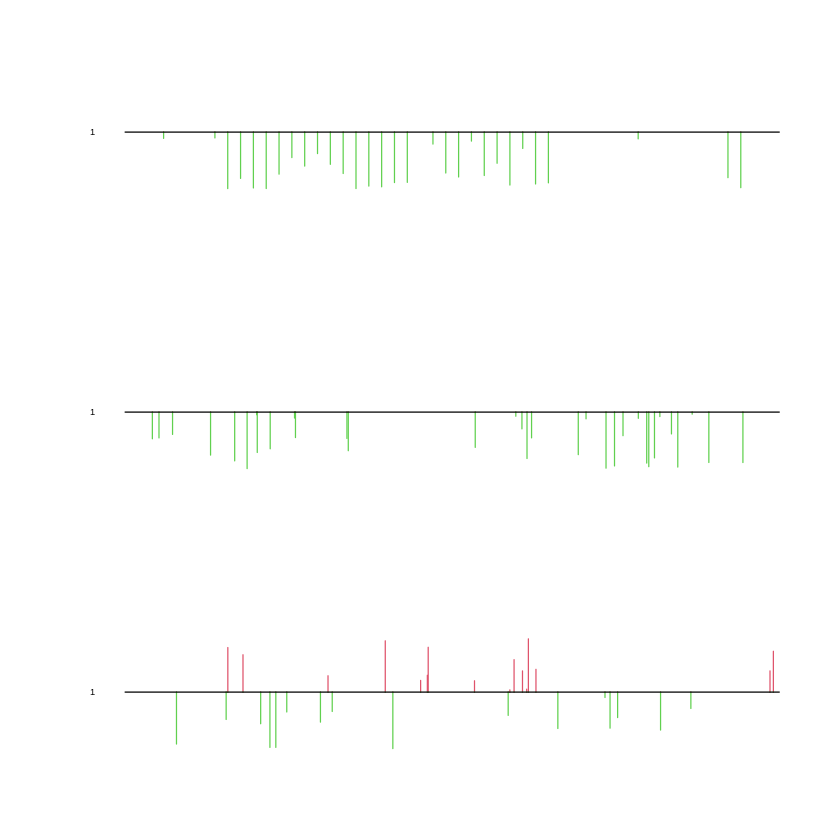

In [6]:
# Plotting.
# TODO : What with those chromosomes, chrom arg?
par(mfrow=c(3,1))
PMA::PlotCGH(results_3dcca$ws[[1]])#, chrom=rep(1,ncol(mirna_m)))
PMA::PlotCGH(results_3dcca$ws[[2]])#, chrom=rep(2,ncol(rna_m)))
PMA::PlotCGH(results_3dcca$ws[[3]])#, chrom=rep(3,ncol(protein_m)))results_3dcca

In [7]:
# TODO Analyze resutls.
str(results_3dcca)

List of 7
 $ ws     :List of 3
  ..$ : num [1:51, 1] 0 0 -0.0273 0 0 ...
  ..$ : num [1:6317, 1] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ : num [1:777, 1] 0 0 0 0 0 0 0 0 0 0 ...
 $ ws.init:List of 3
  ..$ : num [1:51, 1] 0.0492 0.0701 -0.1669 0.0182 -0.0136 ...
  ..$ : num [1:6317, 1] 0.01402 -0.00321 0.00992 0.01375 0.01388 ...
  ..$ : num [1:777, 1] 0.01192 0.03426 0.00681 0.00662 -0.04848 ...
 $ K      : int 3
 $ call   : language PMA::MultiCCA(xlist = data, penalty = 5, type = "standard", standardize = FALSE)
 $ type   : chr [1:3] "standard" "standard" "standard"
 $ penalty: num [1:3] 5 5 5
 $ cors   : num 3
 - attr(*, "class")= chr "MultiCCA"
